 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
"""
Whale
~~~~~~~~~~~~~~~~

This module provides summary of how a portfolio compares against the market (S&P 500).

This module accepts comma separated .csv file. 

It provides the following output - 

- Comparison of predefined portfolios
- correlation of pre-defined portfolios with market
- volatility of each pre-defined portfolio
- comparison of beta of most correlated portfolio with market
- Comparison of new portfolio against pre-defined portfolio
- correlation of new portfolio with market
- comparison of beta of new portfolio with market

"""
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
#Define path for the closing and daily return of portfolio and TKR 
whale_returns_file =Path(r'.\Data\whale_returns.csv')
algo_returns_file = Path(r'.\Data\algo_returns.csv')
sp500_history_file = Path(r'.\Data\sp500_history.csv')
CIRC_file = Path(r'.\data\CIRC.csv')
NFLX_file = Path(r'.\data\NFLX.csv')
VALE_file = Path(r'.\data\VALE.csv')
JPM_file = Path(r'.\data\JPM.csv')
NUE_file = Path(r'.\data\NUE.csv')

In [3]:
TKR=['CIRC','NFLX','VALE','JPM','NUE'] # List of Tkr symbols for portfolio creation.
#for i in TKR:
 #   filename=i
  #  suffix='.csv'
   # dirname='.\data'
    #i_file=Path(dirname, filename + suffix)
    

In [4]:
def read_file(filename): 
    """ # Function to read file and store the output of the file content into a Pandas dataframe
         :param filename - relative path to the csv file

    """
    df = pd.DataFrame() #Inititalize dataframe to hold csv parsed data 
# Parse CSV file
    
    df = pd.read_csv(filename, index_col=0, parse_dates=True,infer_datetime_format=True)
    df.index = df.index.date #Retain ony date 
    df.index.name = 'Date'
    return df

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
#whale_returns_data = pd.read_csv(whale_returns_file, index_col=0, parse_dates=True,infer_datetime_format=True)
whale_returns_data=read_file(whale_returns_file)
whale_returns_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Shape of the whale portfolio daily return dataframe
whale_returns_data.shape

(1060, 4)

In [7]:
# Datatypes  of the columns
whale_returns_data.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [8]:
#Basic statistics of all columns of whale dataframe
whale_returns_data.describe(include = 'all')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [9]:
#check for nulls
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [10]:
#Drop all null rows
whale_returns_data.dropna(inplace=True)

In [11]:
#Verify if no more null rows exist
whale_returns_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [12]:
#Check shape of dataframe after dropping of nulls
whale_returns_data.shape

(1059, 4)

In [13]:
#Sort dataframe by Date index. Prepare for merge with other dataframes.
whale_returns_data.sort_index(ascending=True,inplace=True)

In [14]:
#Validate sort 
whale_returns_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [15]:
#algo_returns_data = pd.read_csv(algo_returns_file, index_col=0, parse_dates=True,infer_datetime_format=True)
algo_returns_data=read_file(algo_returns_file)
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [16]:
#Check rows and columns of Algo data frame.
algo_returns_data.shape

(1241, 2)

In [17]:
#Check datatypes of columns
algo_returns_data.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [18]:
#Summary of basic statistics of data
algo_returns_data.describe(include = 'all')

,Algo 1,Algo 2
count,1241.000000,1235.000000
mean,0.000667,0.000341
std,0.007972,0.008466
min,-0.030951,-0.036937
25%,-0.003238,-0.003733
50%,0.000135,0.000581
75%,0.003978,0.005194
max,0.098246,0.083734


In [19]:
#Check for null rows
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [20]:
#Drop null rows and update dataframe inplace.
algo_returns_data.dropna(inplace=True)

In [21]:
#Validate null rows do not exist
algo_returns_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [22]:
#Check for shape of dataframe after dropping of null rows.
algo_returns_data.shape

(1235, 2)

In [23]:
#Sort data by date index. Prepare for merge with other data frames.
algo_returns_data.sort_index(ascending=True,inplace=True)

In [24]:
#Validate sort
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [25]:
#sp500_history_data = pd.read_csv(sp500_history_file, index_col=0, parse_dates=True,infer_datetime_format=True)
sp500_history_data=read_file(sp500_history_file)
sp500_history_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [26]:
#Check number of rows and columns of dataframe
sp500_history_data.shape

(1649, 1)

In [27]:
#Check data type of columns
sp500_history_data.dtypes

Close    object
dtype: object

In [28]:
#Basic statistics for dataframe
sp500_history_data.describe(include = 'all')

,Close
count,1649
unique,1639
top,$2723.06
freq,2


In [29]:
#Check for null rows.
sp500_history_data.isnull().sum()

Close    0
dtype: int64

In [30]:
sp500_history_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [31]:
#Remove any characters from Close columns and convert to float.
sp500_history_data['Close'] = sp500_history_data['Close'].str.replace(r'\D', '').astype(float)

C:\Users\BalleBalle\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [32]:
#Validate data
sp500_history_data.head()

,Close
Date,
2019-04-23,293368.0
2019-04-22,290797.0
2019-04-18,290503.0
2019-04-17,290045.0
2019-04-16,290706.0


In [33]:
sp500_history_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8+ KB


In [34]:
#Sort data by date index. Prepare for merge with other data frames.
sp500_history_data.sort_index(ascending=True,inplace=True)

In [35]:
#algo_returns_data.sort_index(ascending=True,inplace=True)

In [36]:
#whale_returns_data.sort_index(ascending=True,inplace=True)

In [37]:
#Validate sort
sp500_history_data.head()

,Close
Date,
2012-10-01,144449.0
2012-10-02,144575.0
2012-10-03,145099.0
2012-10-04,146140.0
2012-10-05,146093.0


In [38]:
# Calculate Daily Returns for S&P 500. S&P 500 contains closing prices. Convert the S&P 500 closing prices to daily returns.
#sp500_history_data['S&P 500'] = (sp500_history_data['Close']/ sp500_history_data['Close'].shift(1)) -1
sp500_history_data['S&P 500'] = sp500_history_data.pct_change(1)

In [39]:
sp500_history_data.head()

,Close,S&P 500
Date,,
2012-10-01,144449.0,NaN
2012-10-02,144575.0,0.000872
2012-10-03,145099.0,0.003624
2012-10-04,146140.0,0.007174
2012-10-05,146093.0,-0.000322


In [40]:
#Drop any null rows
sp500_history_data.dropna(inplace=True)

In [41]:
#Validate no null rows exist
sp500_history_data.head()

,Close,S&P 500
Date,,
2012-10-02,144575.0,0.000872
2012-10-03,145099.0,0.003624
2012-10-04,146140.0,0.007174
2012-10-05,146093.0,-0.000322
2012-10-08,145588.0,-0.003457


In [42]:
#Drop Close column
sp500_history_data.drop(labels='Close', axis=1,inplace=True)

In [43]:
#Validate columns in S&P 500 dataframe
sp500_history_data.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [44]:
sp500_history_data.shape

(1648, 1)

In [45]:
algo_returns_data.shape

(1235, 2)

In [46]:
whale_returns_data.shape

(1059, 4)

In [47]:
#Additional check for any duplicates in S&P 500.
sp500_history_data[sp500_history_data.duplicated()]

,S&P 500
Date,


## Combine Whale, Algorithmic, and S&P 500 Returns

In [48]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
merged_df=pd.merge(pd.merge(whale_returns_data,algo_returns_data,on='Date'),sp500_history_data,on='Date')

In [49]:
merged_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 2015-03-03 to 2019-04-23
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1043 non-null   float64
 1   PAULSON & CO.INC.            1043 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1043 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1043 non-null   float64
 4   Algo 1                       1043 non-null   float64
 5   Algo 2                       1043 non-null   float64
 6   S&P 500                      1043 non-null   float64
dtypes: float64(7)
memory usage: 65.2+ KB


In [51]:
merged_df.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'S&P 500'],
      dtype='object')

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

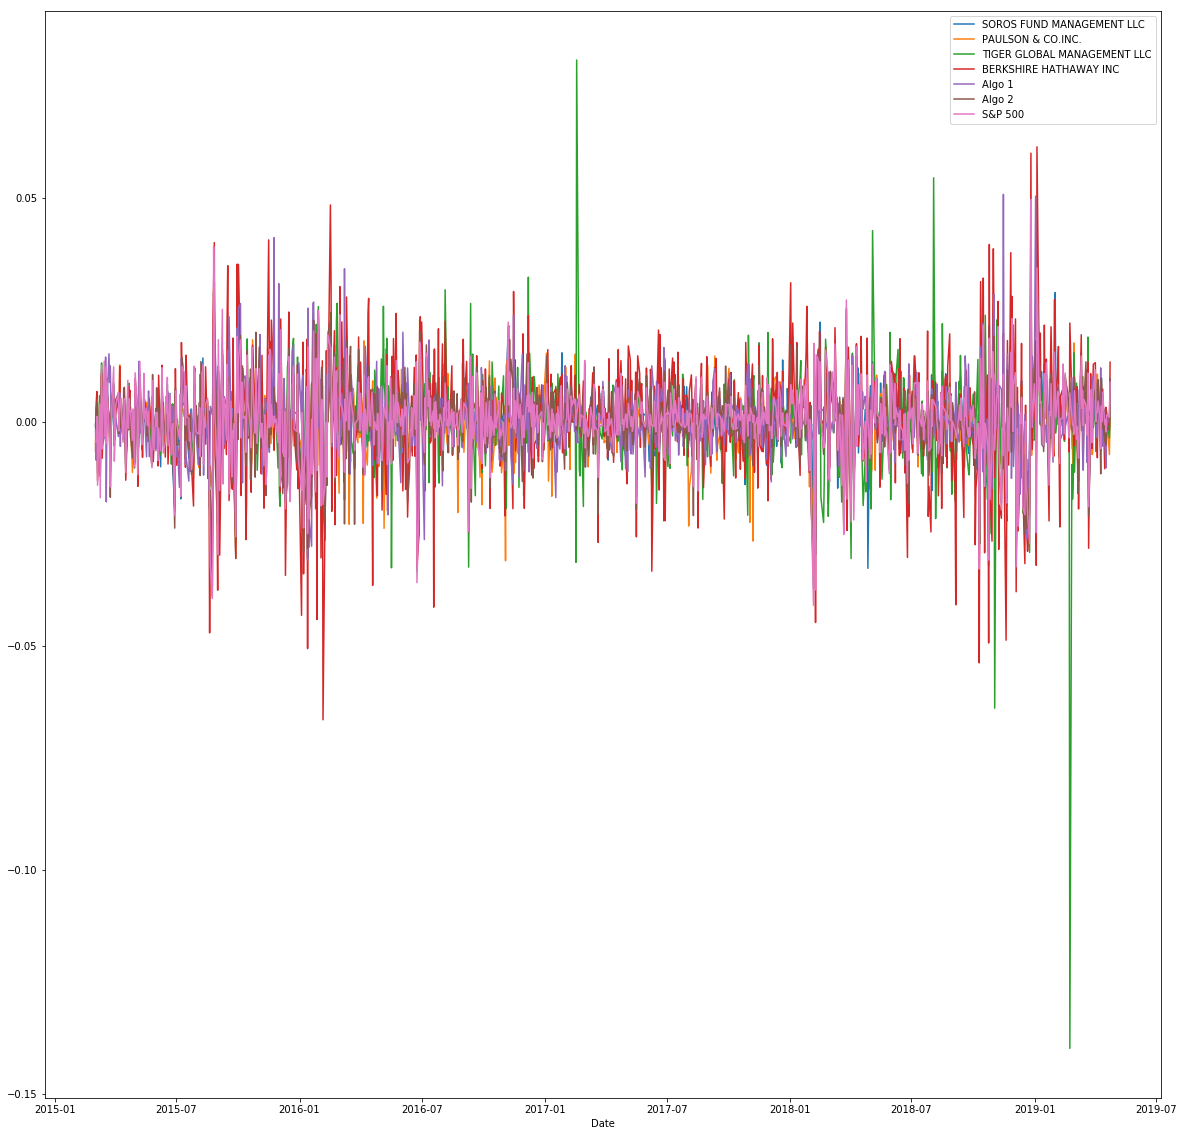

In [52]:
# Plot daily returns of all portfolios
merged_df.plot(figsize=(20, 20))

#### Calculate and Plot cumulative returns.

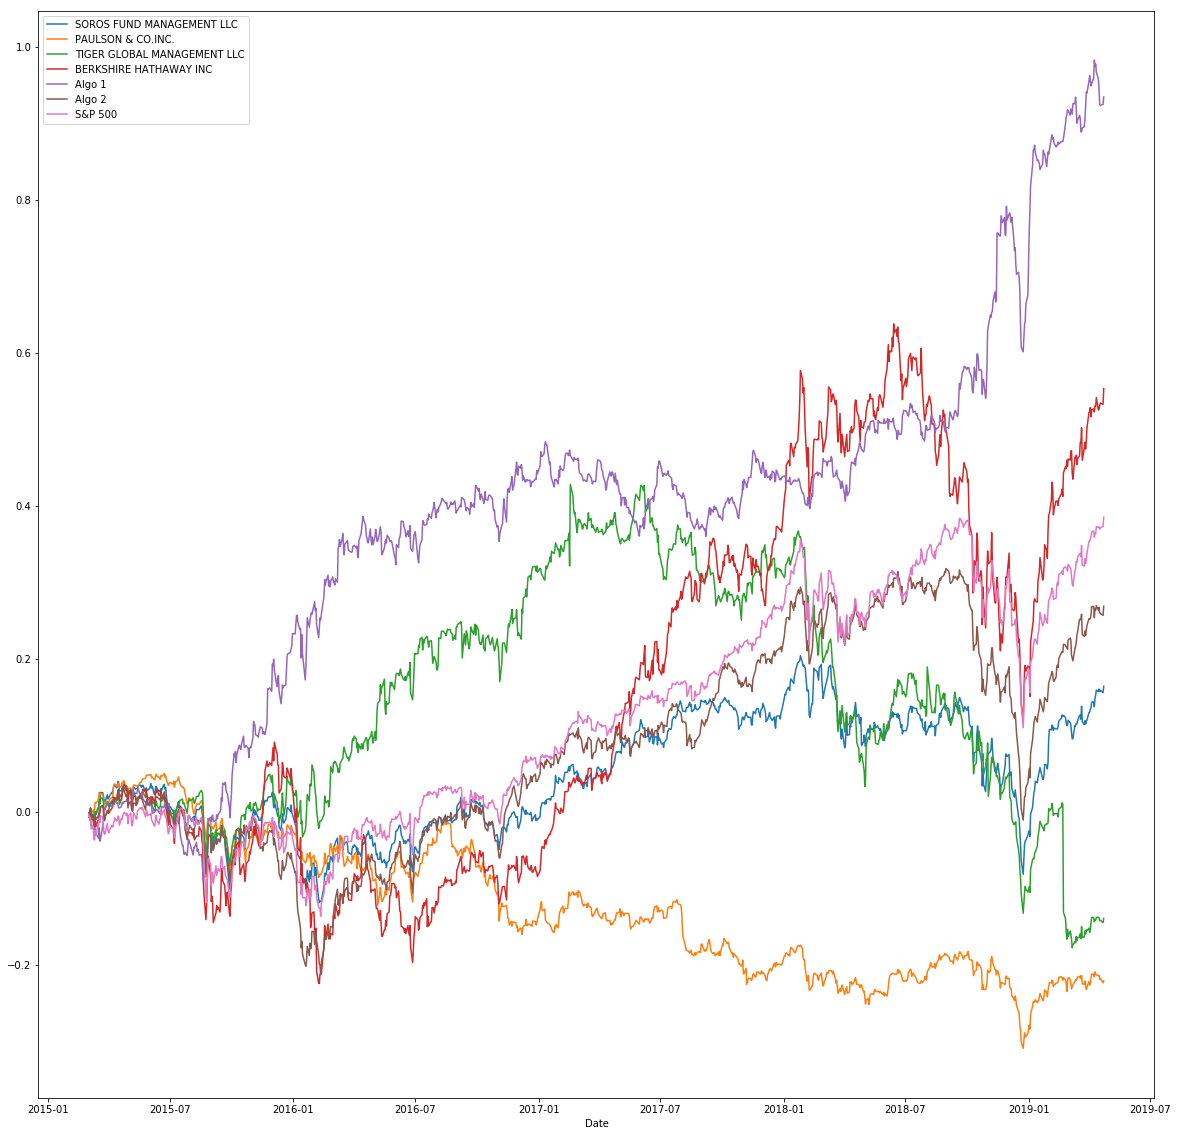

In [53]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
((merged_df + 1).cumprod() - 1).plot(figsize=(20, 20))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


Text(0, 0.5, 'Daily returns')

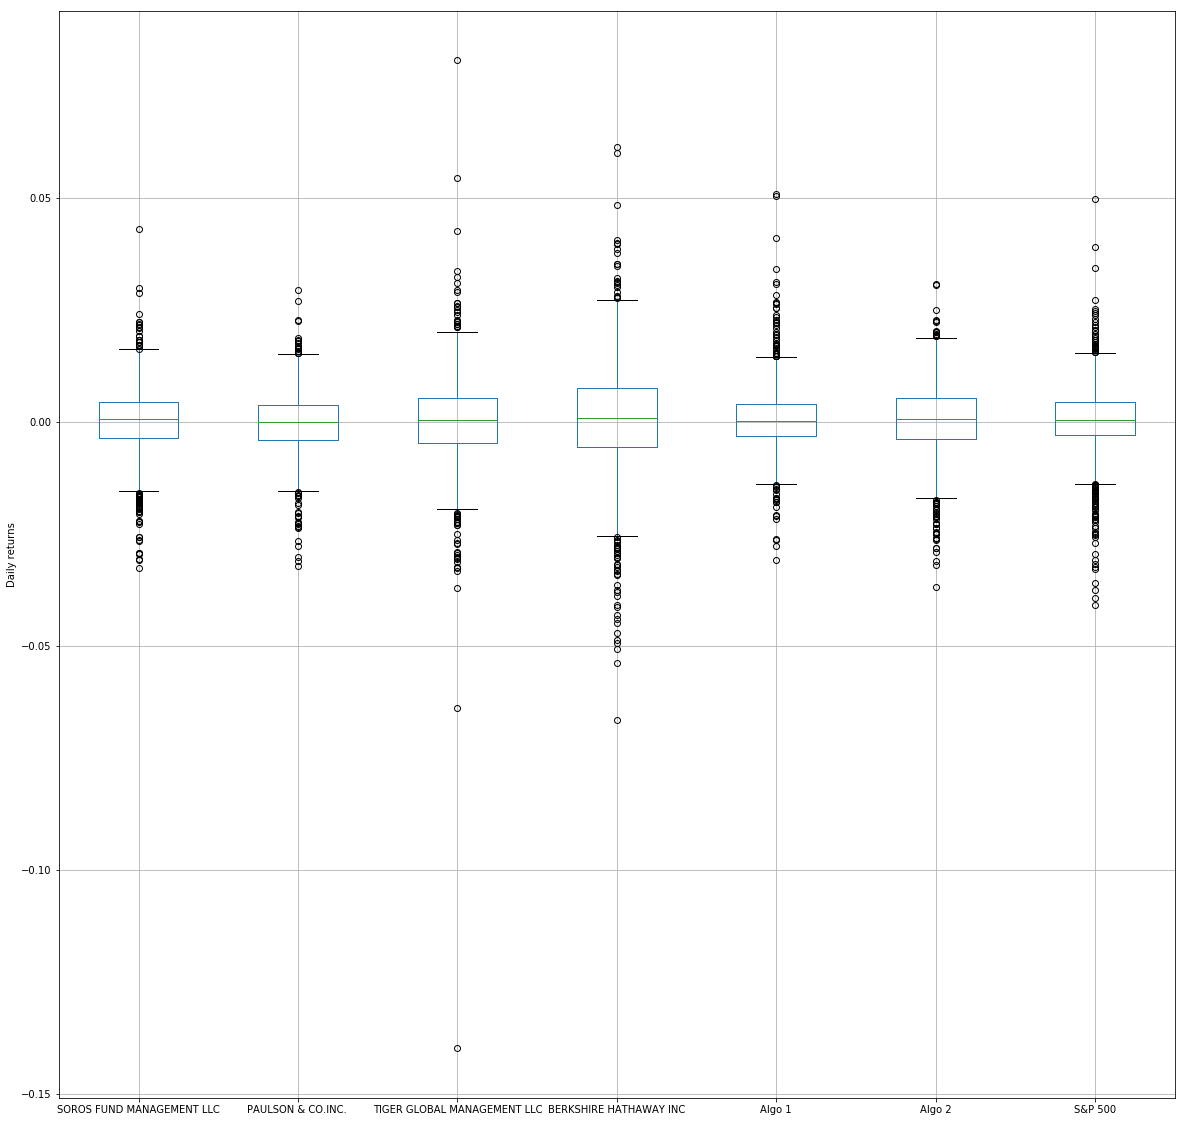

In [54]:
ax = merged_df.boxplot(column=list(merged_df.columns),figsize=(20, 20))

ax.set_ylabel("Daily returns")


### Calculate Standard Deviations

In [55]:
# Calculate the daily standard deviations of all portfolios. Method 1.
merged_df.describe(include='all')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.000177,-0.000214,-0.000083,0.000506,0.000662,0.000263,0.000349
std,0.007895,0.007023,0.010894,0.012919,0.007620,0.008342,0.008554
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.040979
25%,-0.003638,-0.004042,-0.004790,-0.005634,-0.003252,-0.003794,-0.002881
50%,0.000518,0.000000,0.000320,0.000735,0.000069,0.000703,0.000419
75%,0.004328,0.003626,0.005285,0.007619,0.003908,0.005253,0.004471
max,0.042977,0.029338,0.080705,0.061341,0.050735,0.030822,0.049594


In [56]:
# Calculate the daily standard deviations of all portfolios. Method 2.
merged_df.std().sort_values() 

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [57]:
# Calculate  the daily standard deviation of S&P 500
merged_df['S&P 500'].std()
# Determine which portfolios are riskier than the S&P 500
merged_df.std().loc[merged_df.std() > merged_df['S&P 500'].std()]

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

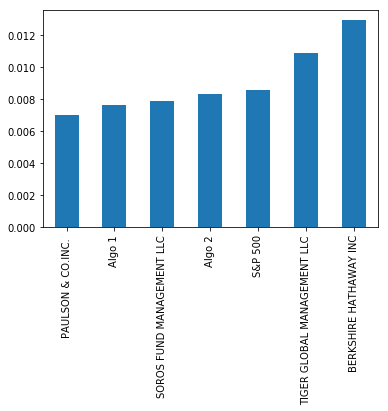

In [58]:
#Method 2 - using sorted bar graph
merged_df.std().sort_values().plot(kind='bar')

Above two outcome show that Tiger GlobalManagement LLC and Bershire Heathaway Inc are more riskier than S&P 500.

### Calculate the Annualized Standard Deviation

In [59]:
# Calculate the annualized standard deviation (252 trading days)
merged_df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [60]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
merged_df.rolling(window=21).std()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


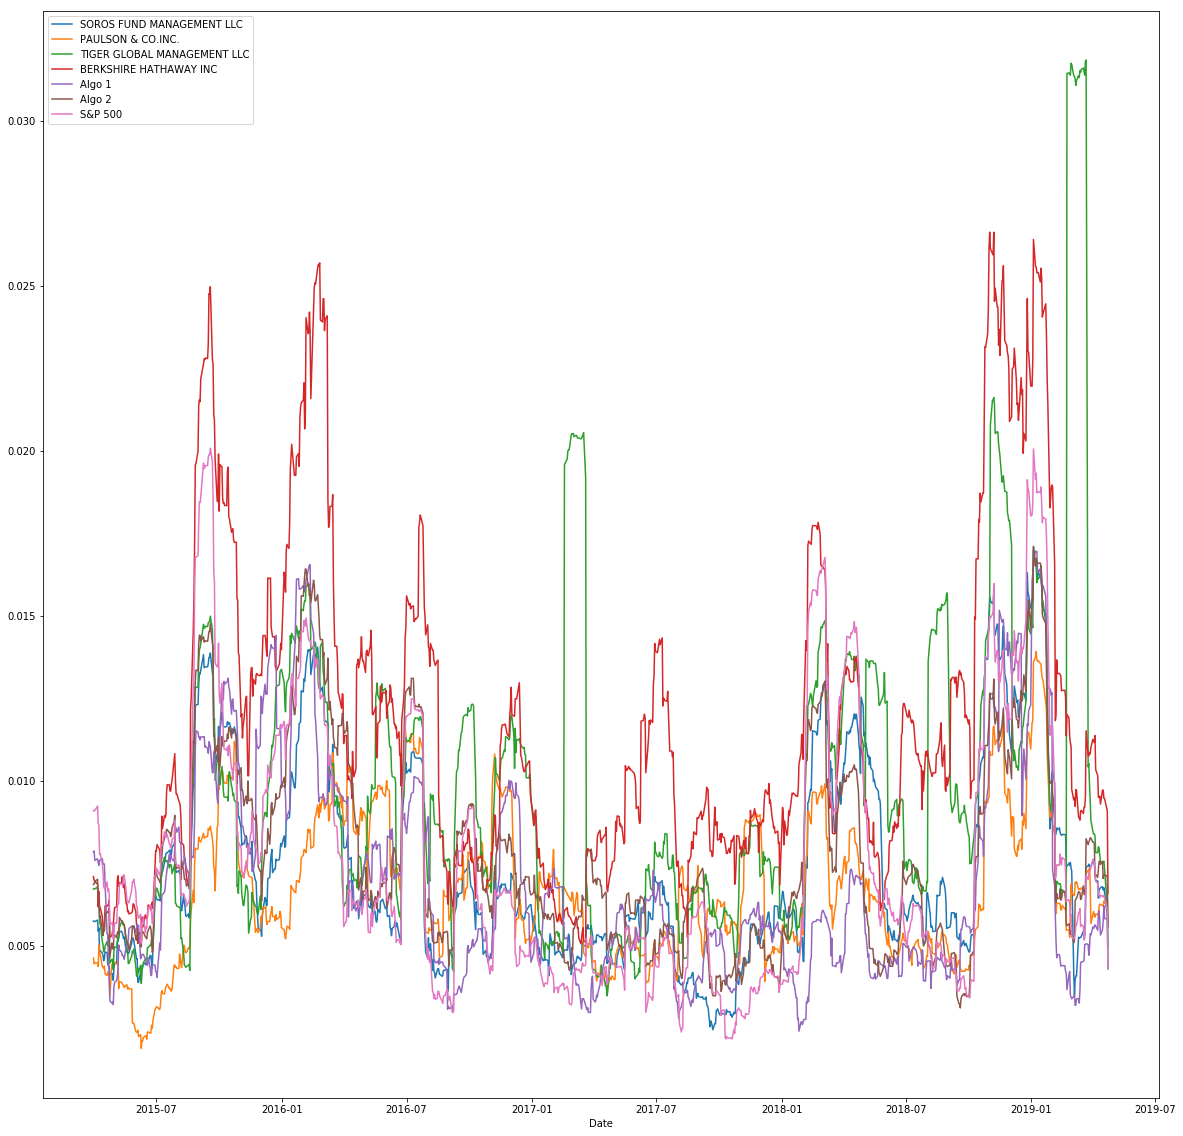

In [61]:
# Plot the rolling standard deviation
merged_df.rolling(window=21).std().plot(figsize=(20, 20))

### Calculate and plot the correlation

In [62]:
# Calculate the correlation
merged_df.corr().style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


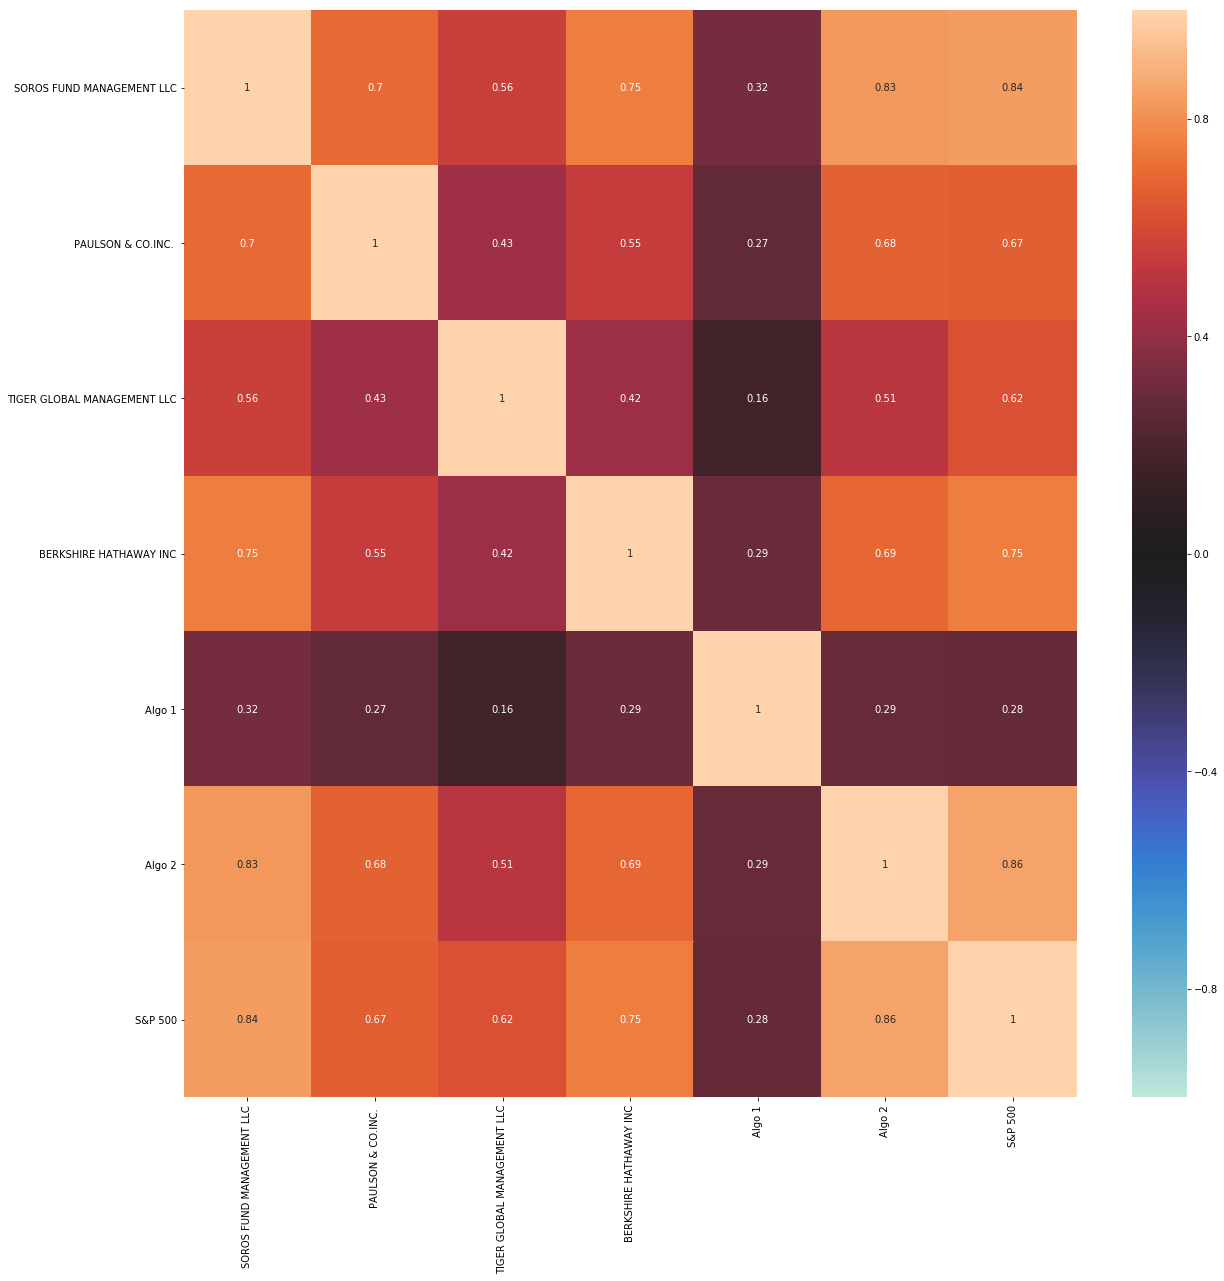

In [63]:
# Display de correlation matrix
plt.figure(figsize=(20,20))
sn.heatmap(merged_df.corr(), annot=True,vmin=-1, vmax=1, center=0)
plt.show()

From above two output's The greatest correlation between S&P 500 and other portfolio is Algo 2

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [64]:
# Calculate covariance of a single portfolio
merged_df['Algo 2'].cov(merged_df['S&P 500'])


6.127932374144989e-05

In [65]:
# Calculate variance of S&P 500
merged_df['S&P 500'].var()

7.316632424648704e-05

In [66]:
# Computing beta
merged_df['Algo 2'].cov(merged_df['S&P 500'])/merged_df['S&P 500'].var()
# Plot beta trend

0.837534540275776

In [67]:
#Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500.
merged_df['Algo 2'].rolling(window=60).cov(merged_df['S&P 500'])/merged_df['S&P 500'].rolling(window=60).var()
                               

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.910622
2019-04-17    0.923897
2019-04-18    0.925305
2019-04-22    0.926647
2019-04-23    0.922600
Length: 1043, dtype: float64

In [68]:
def calc_rolling_beta(df,myportfolio,chkportfolio,day):
    """ # Function to return the beta measured against a stock or portfolio against market.
         :param df - portfolio dataframe
         :param myportfolio - Stock/Portfolio name
         :param df - Market portfolio to measure against.
         :param df - rolling day period.

    """
    df=df
    portfolio1=myportfolio
    portfolio2=chkportfolio
    day=day
    beta=(df[portfolio1].rolling(window=day).cov(df[portfolio2])/df[portfolio2].rolling(window=day).var())
    return beta

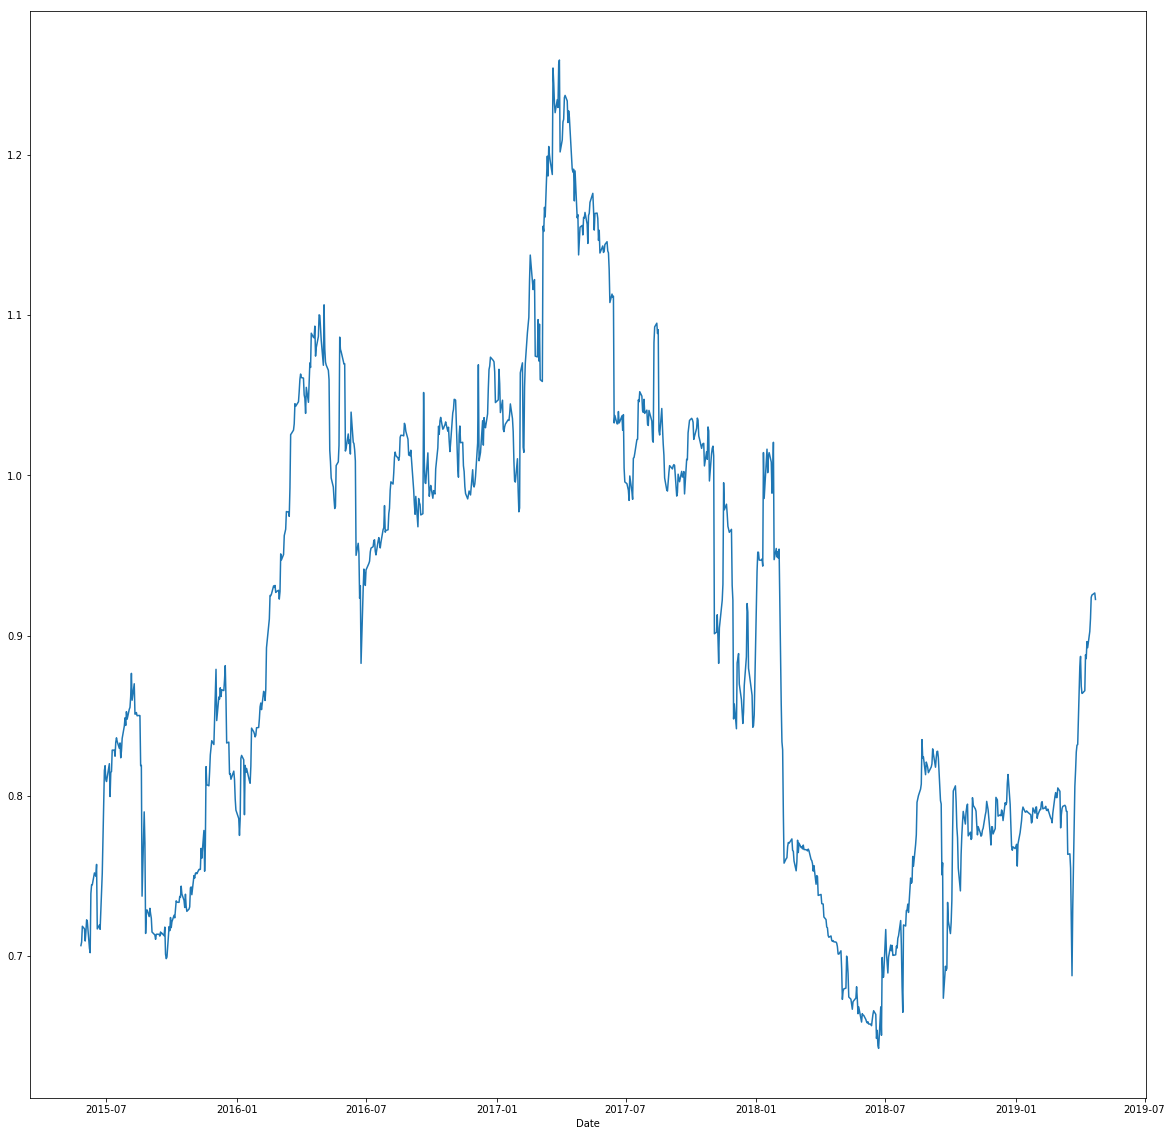

In [69]:
#Choose one portfolio,  plot the 60-day rolling beta between it and the S&P 500.
#(merged_df['Algo 2'].rolling(window=60).cov(merged_df['S&P 500'])/merged_df['S&P 500'].rolling(window=60).var()).plot(figsize=(20,20))
rolling_beta=calc_rolling_beta(merged_df,'Algo 2','S&P 500',60)
rolling_beta.plot(figsize=(20,20))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [70]:
# Use `ewm` to calculate the rolling window
merged_df.ewm(span=21, adjust=False).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,-0.000948,-0.004233,-0.000681,-0.005589,-0.002546,-0.000644,-0.004525
2015-03-05,-0.000496,-0.003478,-0.000405,-0.004469,-0.002402,-0.000192,-0.004005
2015-03-06,-0.001170,-0.003486,-0.001139,-0.005253,-0.002634,-0.001216,-0.004929
2015-03-09,-0.001011,-0.002785,-0.000504,-0.004926,-0.002890,-0.000987,-0.004123
...,...,...,...,...,...,...,...
2019-04-16,0.002021,0.000516,0.000721,0.001277,0.000012,0.001271,0.001544
2019-04-17,0.001574,-0.000119,0.000255,0.001454,-0.000926,0.000680,0.001197
2019-04-18,0.001563,0.000003,0.000285,0.001496,-0.000895,0.000507,0.001232


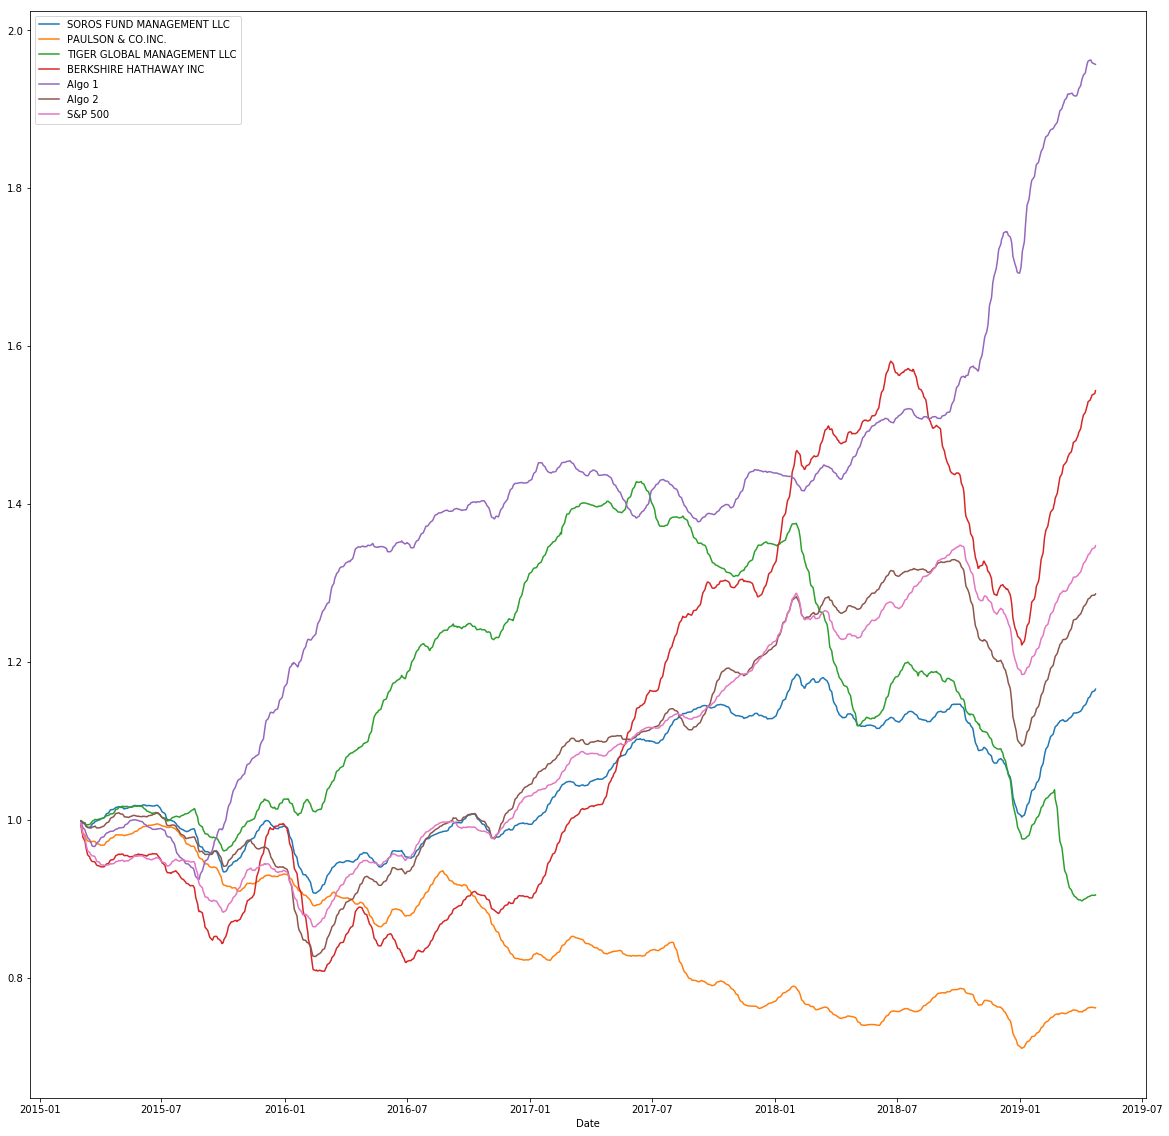

In [71]:

(1 + merged_df.ewm(span=21, adjust=False).mean()).cumprod().plot(figsize=(20,20))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [72]:
def calc_sharp_ratio(df):
    """ # Function to return the sharp ratio for a portfolio.
         :param df - portfolio dataframe
         
    """
    sharpe_ratios = (df.mean() * 252) / (df.std() * np.sqrt(252))
    return sharpe_ratios

In [73]:
# Annualized Sharpe Ratios
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios=calc_sharp_ratio(merged_df)
#sharpe_ratios = (merged_df.mean() * 252) / (merged_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

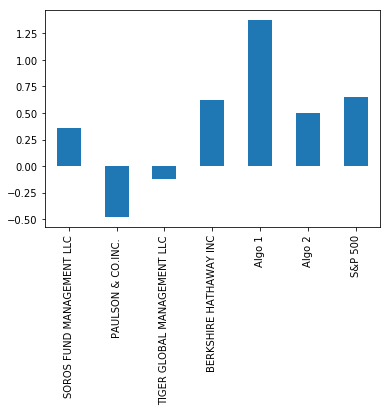

In [74]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on the above graph. The return over risk ratio is best for Algo portfolio 1 then either Whale or S&P 500.
Algo 2 is underperforming than S&P 500.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [75]:
# Reading data from 1st stock
circ=read_file(CIRC_file)
#Rnaming the column name
circ.columns=[TKR[0]]
#Calculating daily return and replacing the closing price column with daily return
circ[TKR[0]]=circ.pct_change(1)
#Drop any null rows
circ.dropna(inplace=True)
#Sort index in ascending order
circ.sort_index(ascending=True,inplace=True)
circ.head()

,CIRC
Date,
2018-10-29,-0.058824
2018-10-30,0.000000
2018-10-31,0.020833
2018-11-01,0.053061
2018-11-02,0.003876


In [76]:
# Reading data from 2nd stock
nflx=read_file(NFLX_file)
nflx.columns=[TKR[1]]
# Calculate daily returns
nflx[TKR[1]]=nflx.pct_change(1)
#Drop any null rows
nflx.dropna(inplace=True)
#Sort index in ascending order
nflx.sort_index(ascending=True,inplace=True)
nflx.head()

,NFLX
Date,
2018-01-03,0.019794
2018-01-04,0.002829
2018-01-05,0.021203
2018-01-08,0.009810
2018-01-09,-0.012921


In [77]:
# Reading data from 3rd stock
nue=read_file(NUE_file)
nue.columns=[TKR[4]]
# Calculate daily returns
nue[TKR[4]]=nue.pct_change(1)
#Drop any null rows
nue.dropna(inplace=True)
#Sort index in ascending order
nue.sort_index(ascending=True,inplace=True)
nue.head()

,NUE
Date,
2018-01-03,0.013079
2018-01-04,-0.002523
2018-01-05,0.009521
2018-01-08,0.005600
2018-01-09,-0.006741


In [78]:
# Reading data from 4th stock
jpm=read_file(JPM_file)
jpm.columns=[TKR[3]]
# Calculate daily returns
jpm[TKR[3]]=jpm.pct_change(1)
#Drop any null rows
jpm.dropna(inplace=True)
#Sort index in ascending order
jpm.sort_index(ascending=True,inplace=True)
jpm.head()

,JPM
Date,
2018-01-03,0.001019
2018-01-04,0.009069
2018-01-05,-0.006420
2018-01-08,0.001477
2018-01-09,0.005069


In [79]:
# Reading data from 5th stock
vale=read_file(VALE_file)
vale.columns=[TKR[2]]
# Calculate daily returns
vale[TKR[2]]=vale.pct_change(1)
#Drop any null rows
vale.dropna(inplace=True)
#Sort index in ascending order
vale.sort_index(ascending=True,inplace=True)
vale.head()

,VALE
Date,
2018-01-03,0.006265
2018-01-04,-0.001556
2018-01-05,0.020265
2018-01-08,0.017571
2018-01-09,-0.006006


In [80]:
# Combine all stocks in a single DataFrame

combined_df=pd.concat([circ,nflx,vale,jpm,nue],axis="columns",join="inner")
combined_df.head()

,CIRC,NFLX,VALE,JPM,NUE
Date,,,,,
2018-10-29,-0.058824,-0.049995,-0.053086,0.013827,0.012827
2018-10-30,0.000000,0.003405,0.022425,0.017644,0.018646
2018-10-31,0.020833,0.055876,0.034955,0.021743,0.020894
2018-11-01,0.053061,0.051693,0.027815,-0.000367,0.015054
2018-11-02,0.003876,-0.026089,-0.004510,-0.005506,0.008499


In [81]:
# Drop NAs
combined_df.isnull().sum()


CIRC    0
NFLX    0
VALE    0
JPM     0
NUE     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [82]:
# Set weights
weights = [1/5, 1/5, 1/5,1/5,1/5]

# Calculate portfolio return
my_portfolio_return=combined_df.dot(weights)
# Display sample data
my_portfolio_return.head()

Date
2018-10-29   -0.027050
2018-10-30    0.012424
2018-10-31    0.030861
2018-11-01    0.029451
2018-11-02   -0.004746
dtype: float64

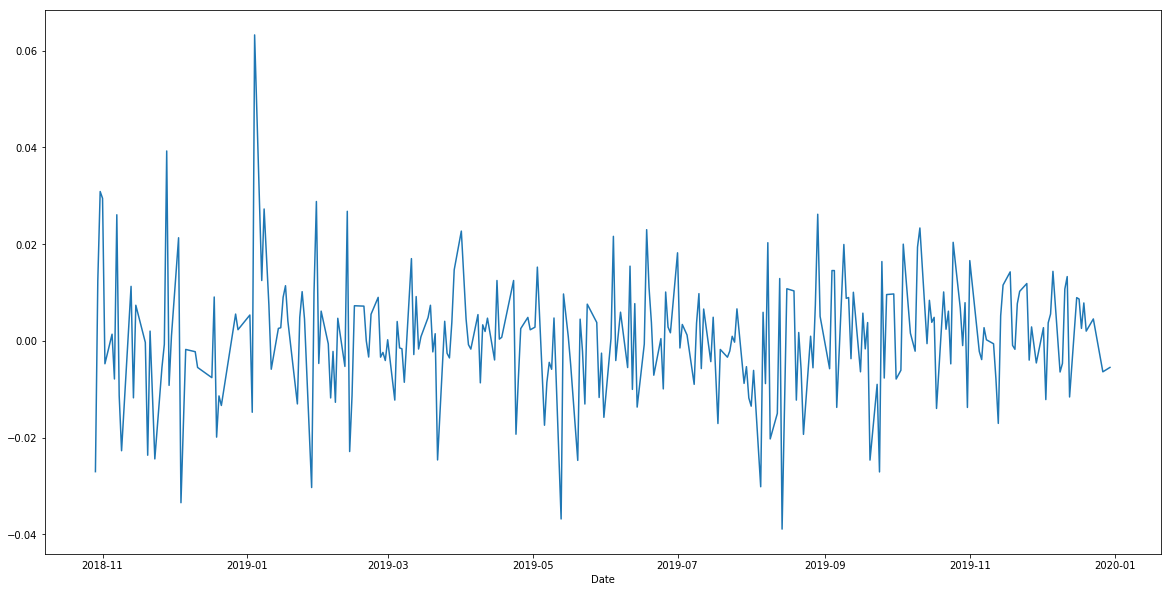

In [83]:
my_portfolio_return.plot(figsize=(20,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [84]:
# Join your returns DataFrame to the original returns DataFrame
joined_portfolio=pd.concat([merged_df,my_portfolio_return],axis="columns",join="inner")
joined_portfolio.rename(columns={0:"CIRC/NFLX/NUE/JPM/VALE"},inplace=True)
joined_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,CIRC/NFLX/NUE/JPM/VALE
Date,,,,,,,,
2018-10-29,-0.008863,-0.000539,0.009597,-0.026635,-0.014957,-0.008412,-0.006560,-0.027050
2018-10-30,0.017069,0.005053,0.009168,0.020352,0.005737,0.009361,0.015667,0.012424
2018-10-31,0.015615,0.005791,-0.002483,0.038589,0.022151,0.006854,0.010851,0.030861
2018-11-01,0.015545,0.022372,0.022348,0.020185,0.028359,0.019114,0.010558,0.029451
2018-11-02,-0.000878,-0.004116,-0.063906,-0.012466,0.003611,-0.001046,-0.006317,-0.004746


In [85]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
CIRC/NFLX/NUE/JPM/VALE         0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

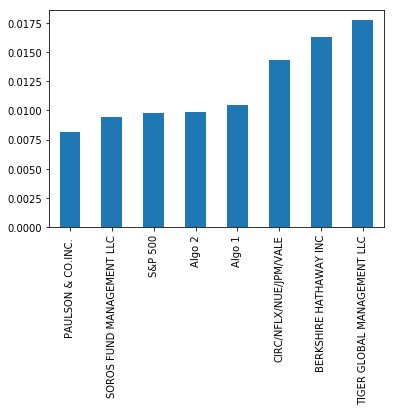

In [86]:
joined_portfolio.std().sort_values().plot(kind='bar')

In [87]:
# Calculate the annualized `std` and sort in ascending volatility
joined_portfolio.std().sort_values(ascending=True)*np.sqrt(252)

PAULSON & CO.INC.              0.128952
SOROS FUND MANAGEMENT LLC      0.149839
S&P 500                        0.154901
Algo 2                         0.156644
Algo 1                         0.166384
CIRC/NFLX/NUE/JPM/VALE         0.227143
BERKSHIRE HATHAWAY INC         0.258232
TIGER GLOBAL MANAGEMENT LLC    0.281320
dtype: float64

Above shows that my portfolio is among the riskiest.

### Calculate and plot rolling `std` with 21-day window

In [88]:
# Calculate rolling standard deviation
joined_portfolio.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,CIRC/NFLX/NUE/JPM/VALE
Date,,,,,,,,
2018-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-15,0.006804,0.006133,0.007332,0.009748,0.005470,0.007587,0.006554,0.008960
2019-04-16,0.006799,0.006084,0.007315,0.009731,0.005752,0.007573,0.006512,0.009271
2019-04-17,0.006773,0.006266,0.007428,0.009732,0.006206,0.007165,0.006538,0.009256


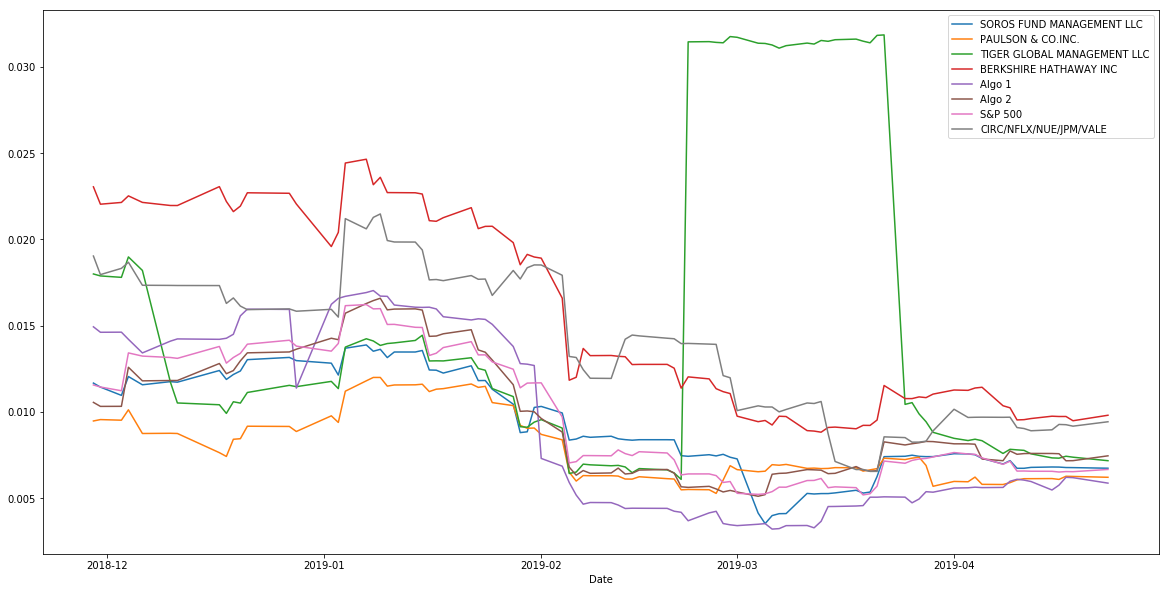

In [89]:
# Plot rolling standard deviation
joined_portfolio.rolling(window=21).std().plot(figsize=(20,10))

Rolling window plot also confirms that my portfolio is highly volaile but less then TIGER and Berkshire

### Calculate and plot the correlation

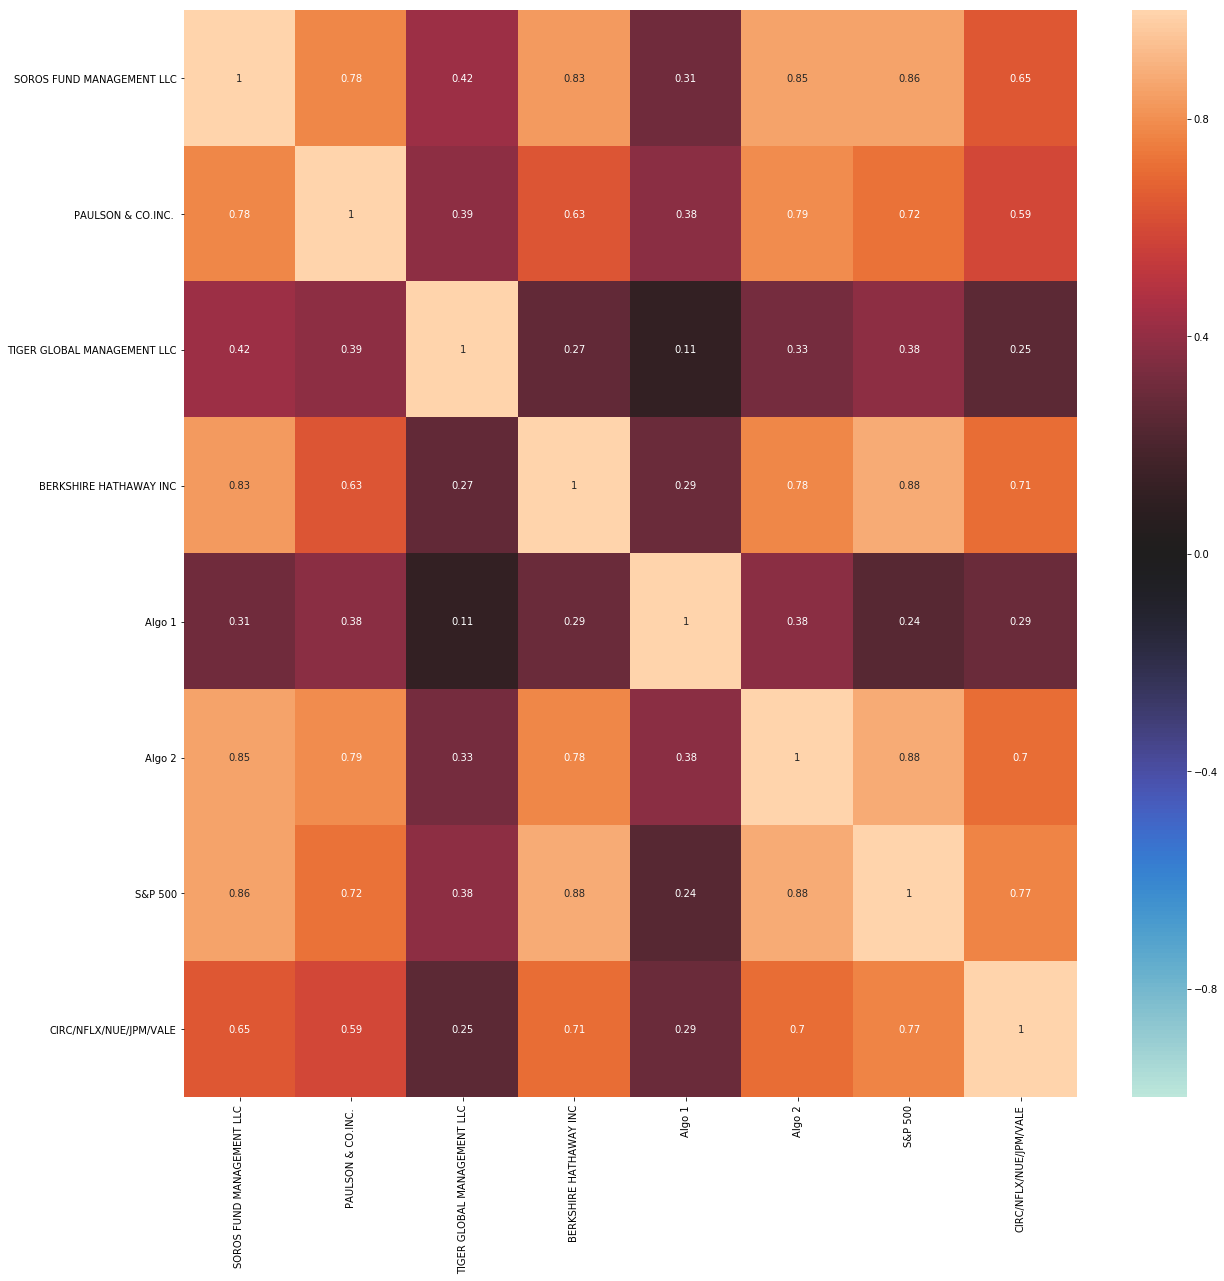

In [90]:
# Calculate and plot the correlation
# Display de correlation matrix
plt.figure(figsize=(20,20))
sn.heatmap(joined_portfolio.corr(), annot=True,vmin=-1, vmax=1, center=0)
plt.show()

My portfolio is highly correlated with market and indicates it moves with the market.

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

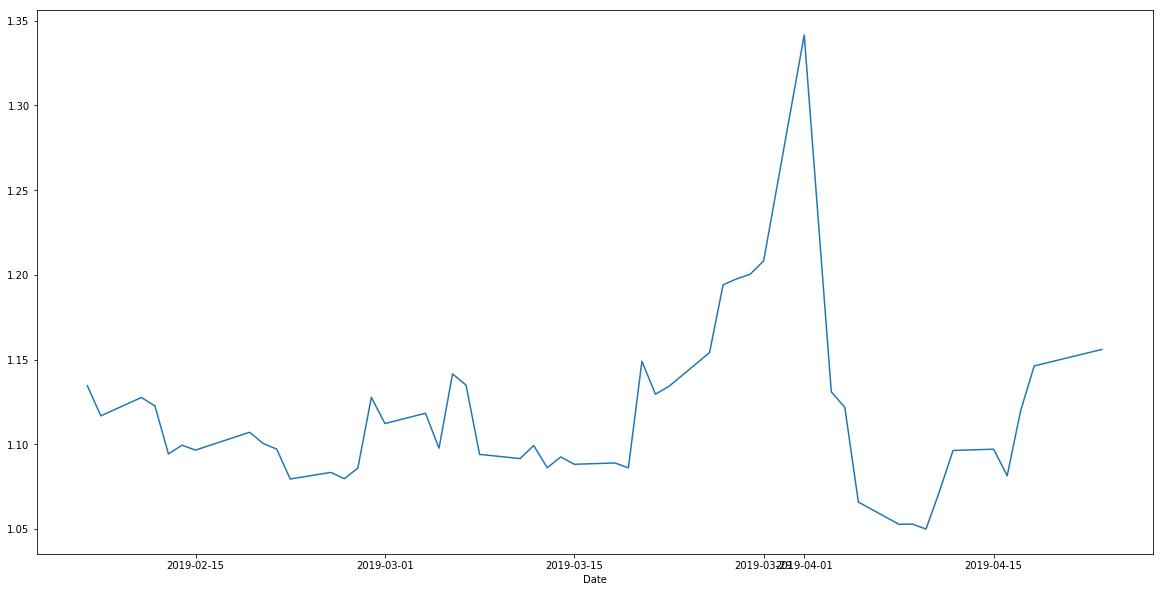

In [91]:
# Calculate and plot Beta
#(joined_portfolio['CIRC/NFLX/NUE/JPM/VALE'].rolling(window=60).cov(joined_portfolio['S&P 500'])/joined_portfolio['S&P 500'].rolling(window=60).var()).plot(figsize=(20,10))
my_rolling_beta=calc_rolling_beta(joined_portfolio,'CIRC/NFLX/NUE/JPM/VALE','S&P 500',60)
my_rolling_beta.plot(figsize=(20,10))

My portfolio though moves with the market but beta above 1 shows that it is more volatile then the market 
and is highly sensitive to the market

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Calculate Annualized Sharpe Ratios
my_sharpe_ratios=calc_sharp_ratio(joined_portfolio)
#my_sharpe_ratios = (joined_portfolio.mean() * 252) / (joined_portfolio.std() * np.sqrt(252))
my_sharpe_ratios

SOROS FUND MANAGEMENT LLC      2.036485
PAULSON & CO.INC.              0.720528
TIGER GLOBAL MANAGEMENT LLC   -0.928591
BERKSHIRE HATHAWAY INC         2.029831
Algo 1                         2.719295
Algo 2                         1.778408
S&P 500                        1.919085
CIRC/NFLX/NUE/JPM/VALE         1.551319
dtype: float64

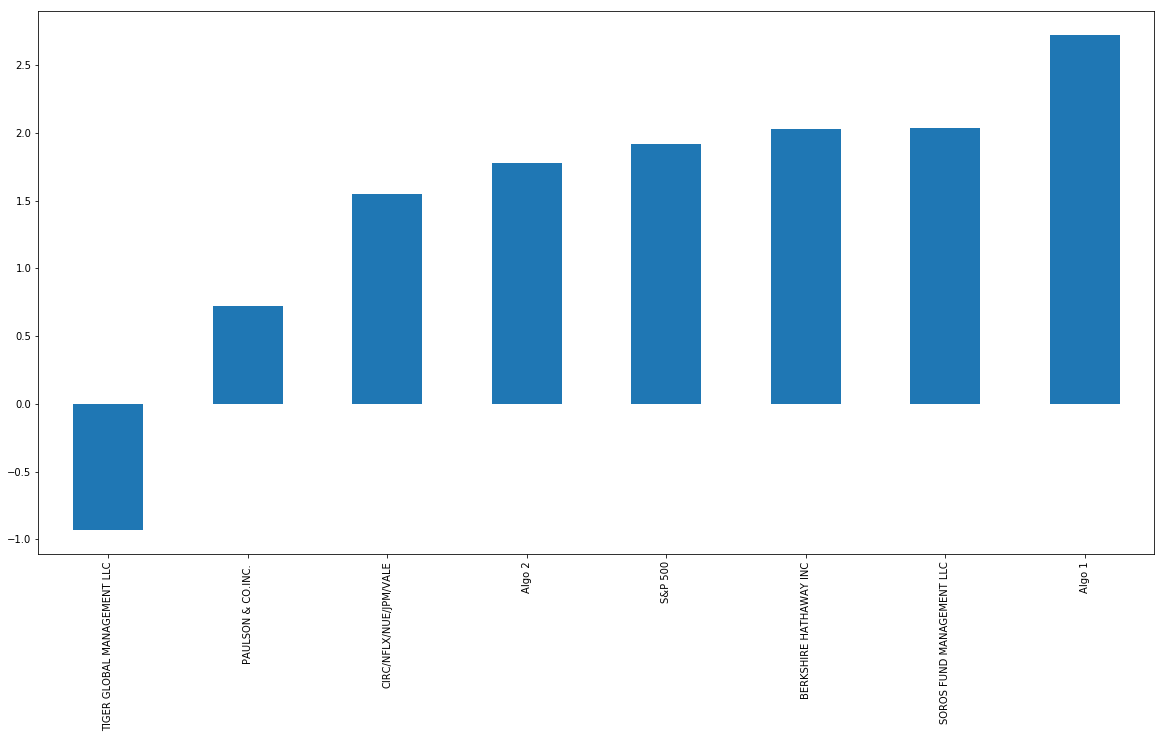

In [93]:
# Visualize the sharpe ratios as a bar plot
my_sharpe_ratios.sort_values(ascending=True).plot(figsize=(20,10),kind='bar')

### How does your portfolio do?

Few facts about the portfolio:
    - I tried to have a diversified assets in my portfolio, cryptocurrency, legacy financial institution,
    FANG company, metal and a mining stock.
    - From volatility perspective, my diversified portfolio seems to be quite volatile as compared to market.
    - This is confirmed by rolling beta values.
    - Sharp ratio shows that my portfolo is performing lower then the market.
My assumption is that the volatility could be due to cryptocurrency. I would like to confirm by checking the 
volatility of each stock of my portfolio

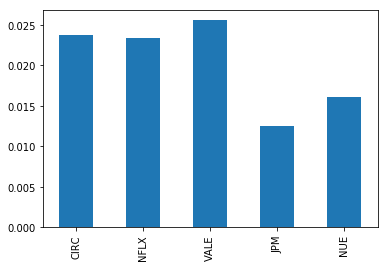

In [94]:
#Check my assumption that CIRC might be the cause of high volatility. 
combined_df.std().plot(kind='bar')

The above graph shows that not only CIRC but Netflix and Vale are also volatile. Let's check the correlation among stocks.

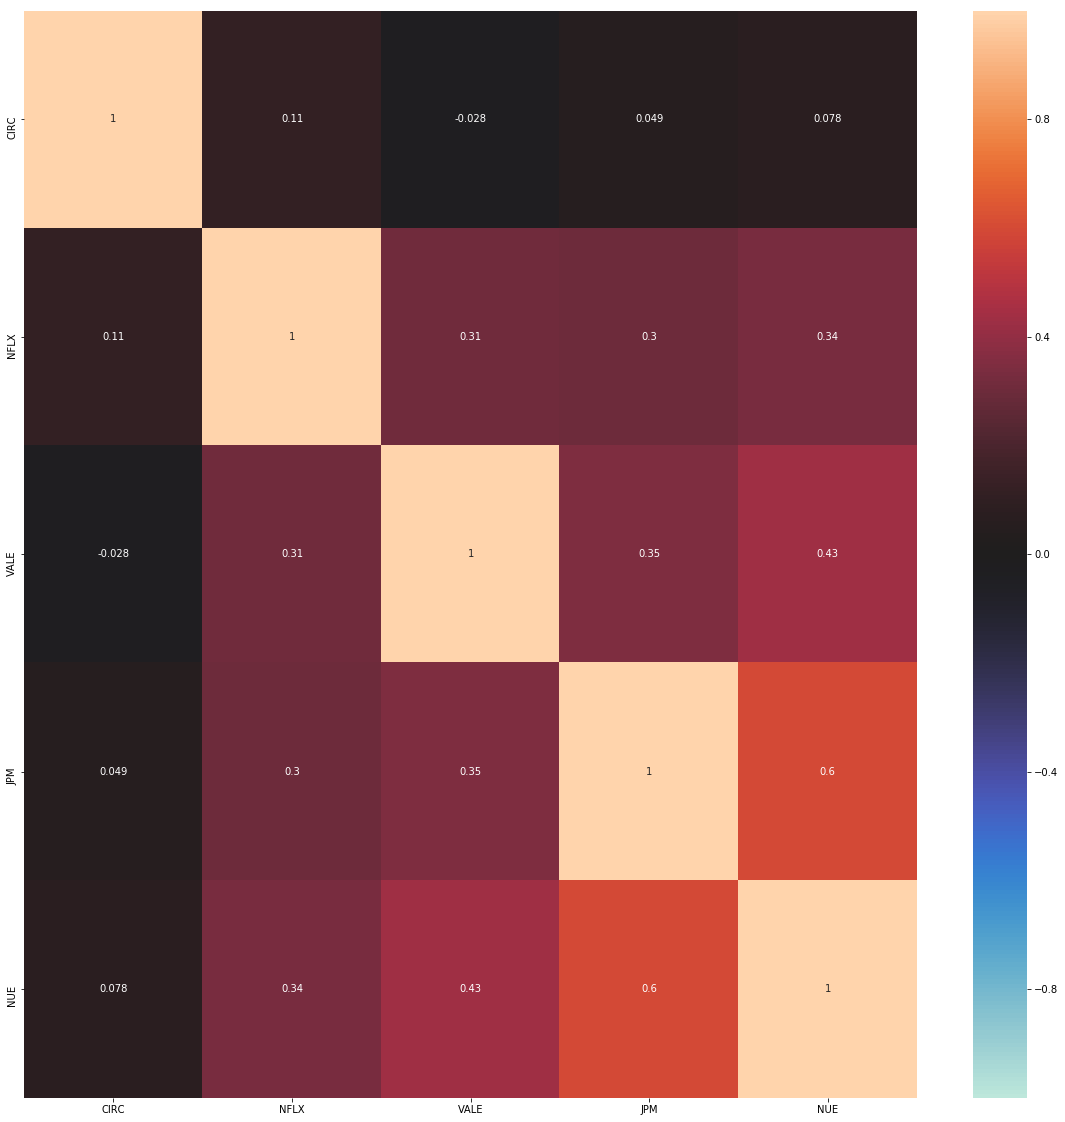

In [95]:
plt.figure(figsize=(20,20))
sn.heatmap(combined_df.corr(), annot=True,vmin=-1, vmax=1, center=0)
plt.show()

In [96]:
# Alternatively, sum total correlation for each stock
combined_df.corr().sum(axis=0).sort_values()

CIRC    1.208467
NFLX    2.059418
VALE    2.064754
JPM     2.302514
NUE     2.445420
dtype: float64

It seems JPM and NUE are highly correlated.

In [97]:
stock_sharpe_ratios = calc_sharp_ratio(combined_df)
stock_sharpe_ratios.sort_values(ascending=False)

JPM     1.659566
NUE     0.578070
CIRC    0.513238
NFLX    0.325195
VALE    0.192462
dtype: float64

Return to risk is not good for NFLX and VALE.

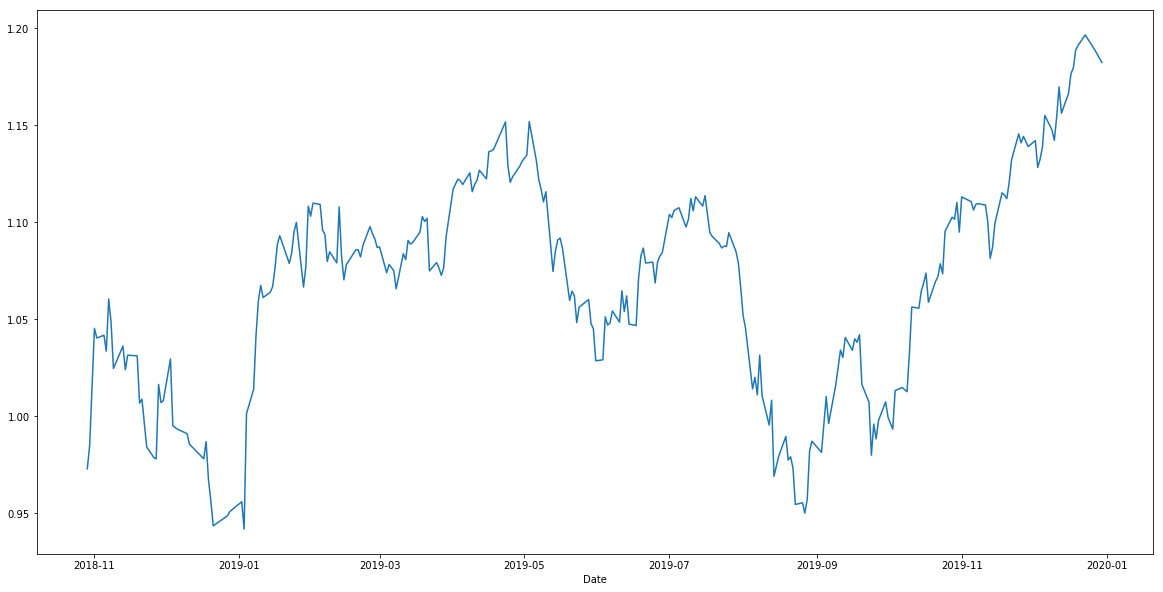

In [98]:
#My portfolio cummulative return.

candidate_cumulative_returns = (1 + my_portfolio_return).cumprod()
candidate_cumulative_returns.plot(figsize=(20,10))

####  Overall it seems that the choice of stocks for my portfolio though seems to be beating market and has high return but is quite volatile.